In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib as mpl
import pandas as pd

In [4]:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/
# master/births.csv
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [5]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [6]:
quartile = np.percentile(births['births'], [25,50,75])
quartile

array([ 4358. ,  4814. ,  5289.5])

In [7]:
mu = quartile[1]
mu

4814.0

In [8]:
sig = 0.74*(quartile[2]-quartile[0]) #표본평균의 추정치임
sig

689.30999999999995

In [9]:
# 이상치 제거하고 births DataFrame을 재정리하기

births = births.query('(births > @mu - 5*@sig) & (births < @mu + 5*@sig)')

In [10]:
# day 열에 일부 null 값이 존재 함으로 데이터 타입이 문자열임
# 따라서 정수형으로 설정하여 계산이 가능하도록 만들어야함

births['day'] = births['day'].astype(int)

In [11]:
#요일 빠르게 계산하기

births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, 
                             format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [13]:
#연도내 일별 출생수 그래프 그리기

# 먼저 데이터를 월과 일별로 분류하자

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [14]:
# 연 월 일 날짜 표현 방식으로 전화 하자

births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


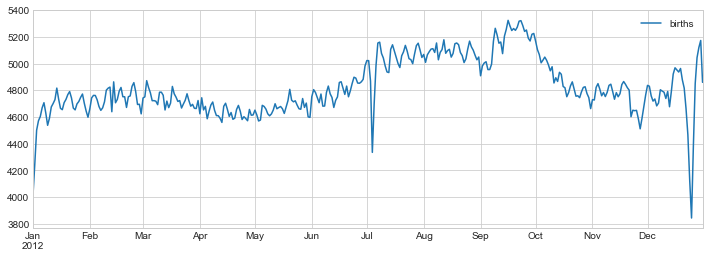

In [15]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

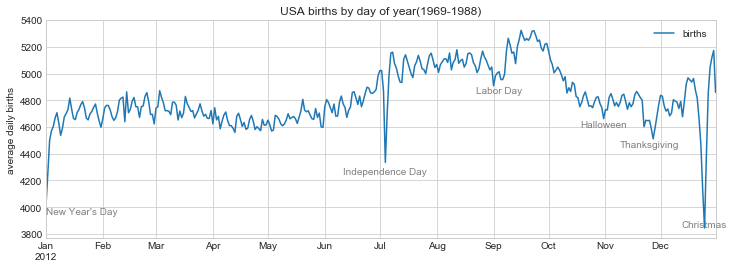

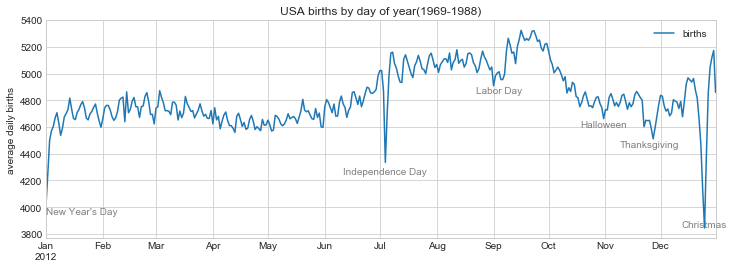

In [17]:
# x,y값에 텍스트를 위치시키는 plt.text, ax.text 명령어로 직접 주석을 달 수 있다

fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

#플롯에 레이블 달기

style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='center', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha='center', **style)

#축에 레이블 추가

ax.set(title='USA births by day of year(1969-1988)', ylabel='average daily births')
fig

페이지 314 - 359 는 각자 필요할 때 참조 하기

변환 및 텍스트 위치
화살표와 주석
눈금 맟춤 변경하기
설정과 스타일 시트(rcParmams 포함)
3차원 플로팅하기
베이스맵을 활용한 지리 데이터
